In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.5 MB 3.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.5 MB 4.3 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.5 MB 5.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 5.3 MB/s eta 0:00:02
   ------------------------- -------------- 7.3/11.5 MB 5.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 5.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.5 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.8 MB/s eta 0:00:00


In [2]:
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'pandas'

In [17]:
df = pd.read_csv('Reviews.csv')

In [18]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


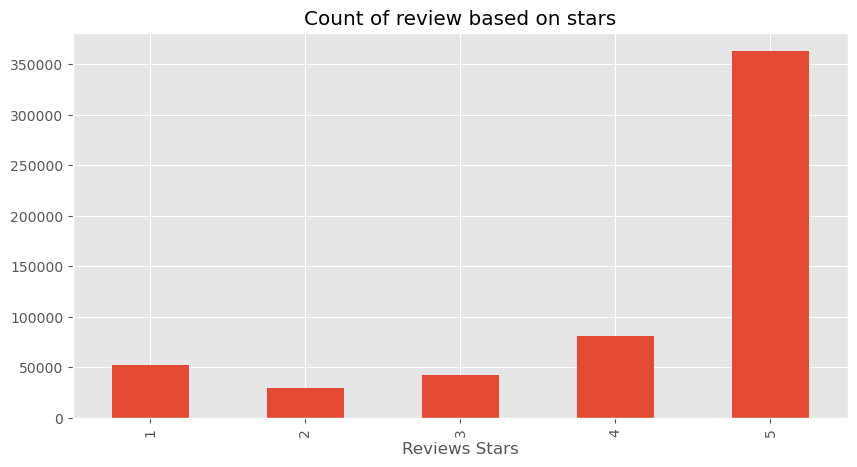

In [5]:
## Quick EDA
ax = df['Score'].value_counts().sort_index().plot(kind='bar', 
              title='Count of review based on stars',
              figsize=(10,5))
ax.set_xlabel('Reviews Stars')
plt.show()

In [19]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [20]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [22]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [23]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [13]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [14]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [15]:
# storing the result in a dictionary for the text being positive, negative, neutral
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [52]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [15]:
vaders_result = pd.DataFrame(res).T
vaders_result = vaders_result.reset_index().rename(columns={'index':'Id'})
vaders_result = vaders_result.merge(df,how='left')

In [16]:
# Sentiment score and matadata
vaders_result

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


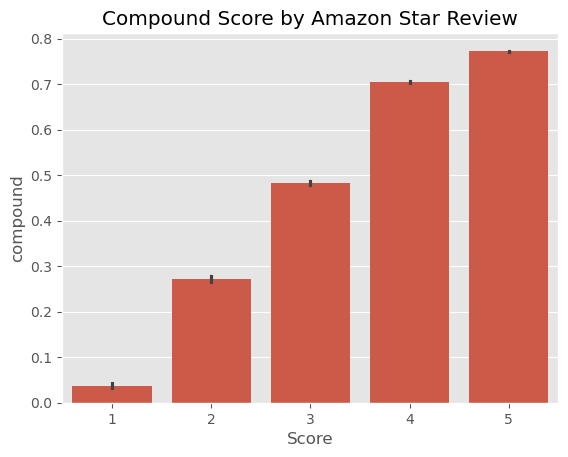

In [17]:
# PLOT VADER RESULT
ax = sns.barplot(data=vaders_result , x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

In [18]:
test = vaders_result.head(500)

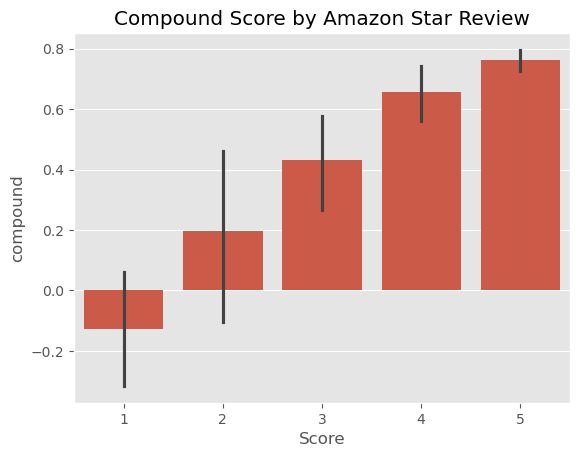

In [19]:
ax = sns.barplot(data=test , x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

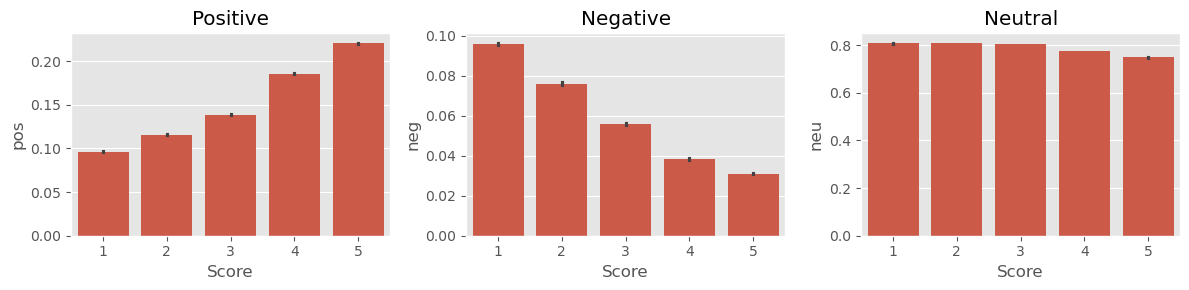

In [20]:
fig,axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders_result , x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders_result , x='Score', y='neg', ax=axs[1])
sns.barplot(data=vaders_result , x='Score', y='neu', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

In [24]:
# making use RoBERTa transfomer for Sentiment Analysis from Hugging Face
import transformers
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# List of labels corresponding to the model's output
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

C:\Users\harsh\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
score_dist = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
score_dist
output


SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    score_dist = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return score_dist


In [47]:
def classify_text(text):
    # Tokenize the text
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, is_split_into_words=False)
    input_ids = tokens["input_ids"]

    # Get predictions
    with torch.no_grad():
        outputs = model(input_ids)
    logits = outputs.logits

    # Ensure the logits tensor has the expected dimensions
    if logits.dim() == 2:
        logits = logits.unsqueeze(0)  # Add a batch dimension if it's missing

    # Convert logits to label indices
    predicted_label_indices = torch.argmax(logits, dim=2).tolist()[0]

    # Convert label indices to label names
    predicted_labels = [model.config.id2label[idx] for idx in predicted_label_indices]

    # Combine tokens and labels
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    # Create a dictionary to store the words classified under each label
    classified_words = {label: [] for label in labels}

    # Fill the dictionary with the words and their corresponding labels
    for token, label in zip(tokens, predicted_labels):
        # Filter out special tokens and only add relevant tokens to the classified words
        if label in labels and not token.startswith("Ġ") and token != "[PAD]":
            classified_words[label].append(token)

    # Filter out empty lists
    classified_words = {label: words for label, words in classified_words.items() if words}

    return classified_words

In [48]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go. And I hate drinking that milk. Because it is harmful"

In [50]:
toxic_result = classify_text(example)
print(toxic_result)

{}


In [29]:
res = {}
reduced_list = df.head(11000)
for i,row in tqdm(reduced_list.iterrows(), total=len(reduced_list)):
    try:
        text = row['Text']
        myid = row['Id']
        #vader_result = sia.polarity_scores(text)
        #vader_result_rename = {}
        #toxic_result = classify_text(text)
        #for key, value in vader_result.items():
        #    vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        #both = {**vader_result_rename, **roberta_result, **toxic_result}
        
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')
        

  0%|          | 0/11000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583
Broke for id 5040
Broke for id 5182
Broke for id 5192
Broke for id 5365
Broke for id 5442
Broke for id 5709
Broke for id 5998
Broke for id 6003
Broke for id 6007
Broke for id 6106
Broke for id 6234
Broke for id 6558

In [30]:
res

{1: {'roberta_neg': 0.009624231,
  'roberta_neu': 0.0499804,
  'roberta_pos': 0.94039536},
 2: {'roberta_neg': 0.5089862,
  'roberta_neu': 0.4524135,
  'roberta_pos': 0.038600326},
 3: {'roberta_neg': 0.003228897,
  'roberta_neu': 0.09806738,
  'roberta_pos': 0.8987037},
 4: {'roberta_neg': 0.0022951285,
  'roberta_neu': 0.09021923,
  'roberta_pos': 0.90748566},
 5: {'roberta_neg': 0.0016347283,
  'roberta_neu': 0.0103024645,
  'roberta_pos': 0.98806286},
 6: {'roberta_neg': 0.006129581,
  'roberta_neu': 0.021795841,
  'roberta_pos': 0.97207457},
 7: {'roberta_neg': 0.0013047539,
  'roberta_neu': 0.0077737905,
  'roberta_pos': 0.99092144},
 8: {'roberta_neg': 0.002029358,
  'roberta_neu': 0.005685204,
  'roberta_pos': 0.9922854},
 9: {'roberta_neg': 0.0038735797,
  'roberta_neu': 0.09415628,
  'roberta_pos': 0.9019701},
 10: {'roberta_neg': 0.0031034567,
  'roberta_neu': 0.05591217,
  'roberta_pos': 0.9409843},
 11: {'roberta_neg': 0.019134114,
  'roberta_neu': 0.07104441,
  'roberta_p

In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [32]:
results_df.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

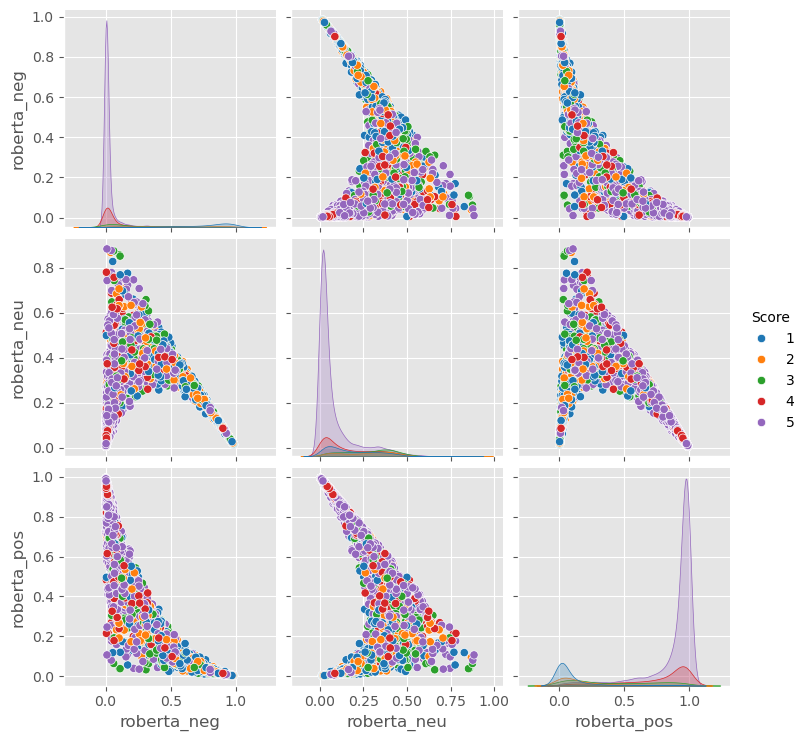

In [33]:
sns.pairplot(data=results_df,
            #  vars=['roberta_neg', 'roberta_neu', 'roberta_pos'],
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [48]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [49]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [50]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [51]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [52]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\harsh\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\harsh\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

C:\Users\harsh\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [53]:
sent_pipeline('I love sentiment analysis!')


[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [54]:
sent_pipeline('Make sure to like and subscribe!')


[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [55]:
sent_pipeline('booo')


[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [53]:
#The issue arises because the model you are using (cardiffnlp/twitter-roberta-base-sentiment) is designed for sequence classification, not token classification. Sequence classification models are trained to assign a single label to the entire input text rather than to individual tokens within the text.
#
#To classify individual words or tokens into categories like "toxic," "severe_toxic," "obscene," etc., you need a token classification model (like a model fine-tuned for Named Entity Recognition or token classification tasks). However, if you still want to work with your current model, you can modify your approach to classify entire sentences or phrases rather than individual tokens.
#Key Points:
# Sentence-Level Classification:

#Since your model is for sequence classification, the classify_text function splits the input text into sentences and classifies each one.
#Label Mapping:

#The label_mapping is a placeholder since your model is not trained for "toxic," "severe_toxic," etc. If you have a model fine-tuned for these categories, update the mapping accordingly.
#Sentence Segmentation:

#The text is split into sentences, and each sentence is classified separately. If a sentence is classified as "toxic," all the words in that sentence are added to the "toxic" category.
#Limitations:
#This approach won't give you token-level classification. To achieve this, you need a token classification model fine-tuned for the specific labels you're interested in.
#The output depends heavily on the granularity of the model and the quality of your label mapping.
#To get precise token-level classification for categories like "toxic," "insult," etc., you would need a different model, ideally one trained for token classification with your desired labels.
